# Tidal flow
This notebook uses the EOF technique to show a spatial map of where the tidal cycle has the greatest impact o

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import xrscipy
import numpy as np
import cartopy.crs as ccrs
from eofs.xarray import Eof
import xesmf as xe
from matplotlib import colorbar, colors
from matplotlib.cm import get_cmap
from roms_regrid import *
from density import *


In [5]:
x=xr.open_mfdataset('/expanse/lustre/projects/cos100/slevy1/icelandBGCdata/*', combine='nested', concat_dim=["time"])

grid=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/Iceland3_grd.nc')
u0=x['u'].sel(depth=-2)
v0=x['v'].sel(depth=-2)

u20=x['u'].sel(depth=-20)
v20=x['v'].sel(depth=-20)

u0=roms_regrid_u(grid,u0)
v0=roms_regrid_v(grid,v0)

u20=roms_regrid_u(grid,u20)
v20=roms_regrid_v(grid,v20)

u0=u0.isel(lon=slice(0,721))
v0=v0.isel(lat=slice(0,721))

u20=u20.isel(lon=slice(0,721))
v20=v20.isel(lat=slice(0,721))

v0=v0.assign_coords(lon=u0.lon)
v0=v0.assign_coords(lat=u0.lat)

v20=v20.assign_coords(lon=u20.lon)
v20=v20.assign_coords(lat=u20.lat)

u0=u0.where(u0 != 0)
v0=v0.where(v0 != 0)
u20=u20.where(u20 != 0)
v20=v20.where(v20 != 0)

In [6]:
v0.load()

<xarray.DataArray (time: 973, lat: 721, lon: 721)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,  0.1002373 ,  0.10053363, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan, -0.03458849, -0.04004015, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.05490153, -0.05514673, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    depth    float32 -2.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Dimensions without coordinates: time
Attributes:
    regrid_method:  bilinear

In [7]:
u0.load()

<xarray.DataArray (time: 973, lat: 721, lon: 721)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,  0.08354265,  0.08281276, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan, -0.01323509, -0.01820726, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.05635881, -0.06034839, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    depth    float32 -2.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Dimensions without coordinates: time
Attributes:
    regrid_method:  bilinear

In [8]:
u20.load()

<xarray.DataArray (time: 973, lat: 721, lon: 721)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,  0.08093433,  0.07849719, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,  0.00186553, -0.00140021, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.04254935, -0.04503337, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    depth    float32 -20.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Dimensions without coordinates: time
Attributes:
    regrid_method:  bilinear

In [9]:
v20.load()

<xarray.DataArray (time: 973, lat: 721, lon: 721)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,  0.08201993,  0.08139355, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan, -0.01334065, -0.01530014, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.03331538, -0.0309187 , ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    depth    float32 -20.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Dimensions without coordinates: time
Attributes:
    regrid_method:  bilinear

In [10]:
v0=v0.assign_coords(lon=u0.lon)
v0=v0.assign_coords(lat=u0.lat)
u2=u0**2
v2=v0**2
speed=(u2+v2)**(1/2)

In [11]:
v20=v20.assign_coords(lon=u20.lon)
v20=v20.assign_coords(lat=u20.lat)
u2=u20**2
v2=v20**2
speed20=(u2+v2)**(1/2)

In [12]:
solver = Eof(speed)
solver2 = Eof(speed20)
eofs = solver.eofs(neofs=3)
pcs = solver.pcs(npcs=3)
variance_fractions = solver.varianceFraction()
eofs=eofs.transpose("lat", "lon",'mode')

eofs2 = solver2.eofs(neofs=3)
pcs2 = solver2.pcs(npcs=3)
variance_fractions2 = solver2.varianceFraction()
eofs2=eofs2.transpose("lat", "lon",'mode')

Text(0.5, 1.0, '1st pc 20 m depth (tidal signal)')

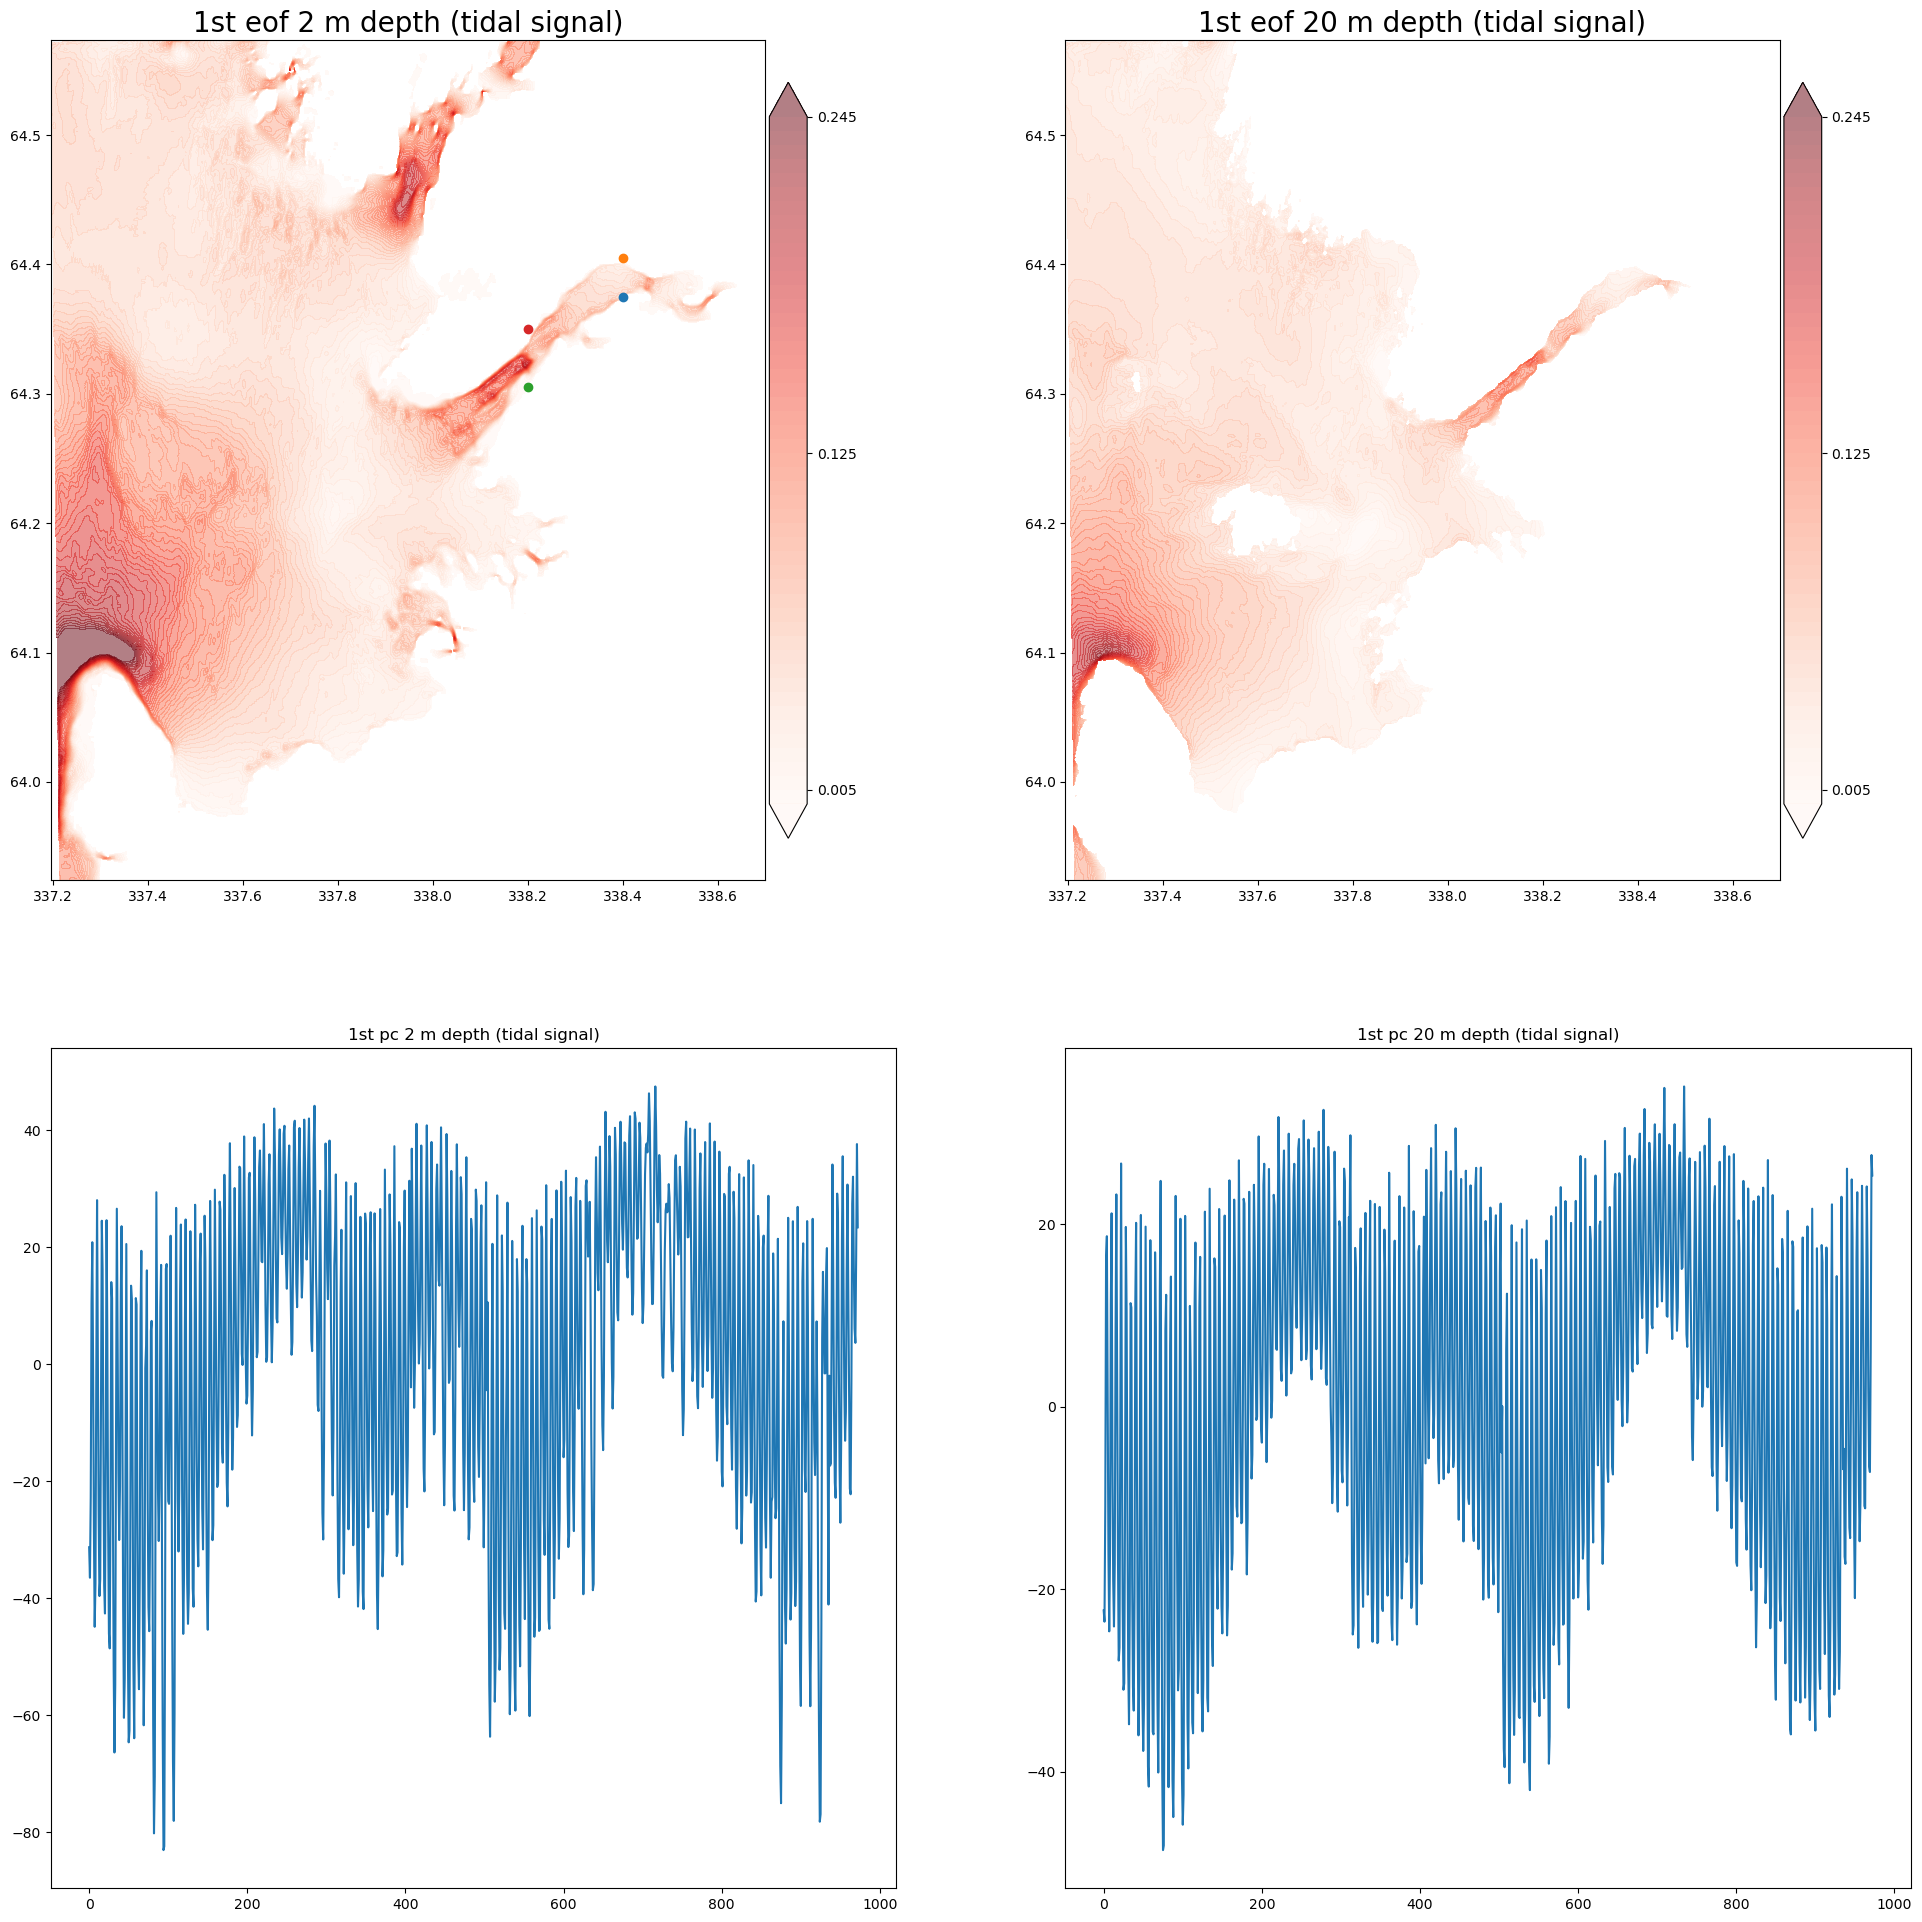

In [13]:


from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(8*3, 8*3))
axlist = axarr.flatten()
k1=-0
k2=0.25
k3=0.005

#k1=5
#k2=10
#k3=0.5

#k3=0.5
plt.rcParams['hatch.linewidth'] = 0.4
levels = np.arange(k1, k2, k3)
cmap = 'Reds'
cmap2 = 'BrBG'

lat1=64.375
lat2=64.405
lon1=338.4
lon2=338.4
lat3=64.305
lat4=64.35
lon3=338.2
lon4=338.2

cf1=axlist[0].contourf(speed.lon,speed.lat,(eofs.sel(mode=0)*40*(-1)),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)

cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
#cb1.set_label('m/s', fontsize=13)
axlist[0].plot(lon1, lat1, marker="o", ls="")
axlist[0].plot(lon2, lat2, marker="o", ls="")
axlist[0].plot(lon3, lat3, marker="o", ls="")
axlist[0].plot(lon4, lat4, marker="o", ls="")
axlist[0].set_title('1st eof 2 m depth (tidal signal)',fontsize=20)

cf1=axlist[1].contourf(speed20.lon,speed20.lat,(eofs2.sel(mode=0)*25*(-1)),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)

cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
#cb1.set_label('m/s', fontsize=13)
axlist[1].set_title('1st eof 20 m depth (tidal signal)',fontsize=20)
axlist[2].plot(pcs.sel(mode=0))
axlist[2].set_title('1st pc 2 m depth (tidal signal)')

axlist[3].plot(pcs2.sel(mode=0))
axlist[3].set_title('1st pc 20 m depth (tidal signal)')